In [1]:
TASK = "error-rate-reconstructing-genome"
DATE = "2021-04-24"
DIR = "$(homedir())/$(DATE)-$(TASK)"
if !isdir(DIR)
    mkdir(DIR)
end
cd(DIR)

In [2]:
import Pkg
pkgs = [
    "Eisenia",
    "BioSequences",
    "Revise",
    "BioSequences",
    "LightGraphs",
    "Primes",
    "Statistics",
    "StatsPlots",
    "uCSV",
    "DataFrames",
    "HTTP",
    "CodecZlib",
    "FASTX",
    "ProgressMeter",
    "MetaGraphs",
    "BioSymbols",
    "StatsBase",
    "Random"
]

for pkg in pkgs
    try
        Pkg.add(pkg)
    catch
#         # tried to install an unregistered local package
    end
    eval(Meta.parse("import $pkg"))
end

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


  Resolving package versions...
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes

In [3]:
function kmer_graph_to_gfa(graph, gfa_file)
#     @show "here"
    open(gfa_file, "w") do io
#         @show "here"
        println(io, "H\tVN:Z:1.0")
#         @show "here"
        for (i, kmer) in enumerate(graph.kmers)
            fields = ["S", "$i", string(kmer)]
            line = join(fields, '\t')
            println(io, line)
        end
        
        for edge in LightGraphs.edges(graph.graph)
            oriented_src, oriented_dst = kmer_pair_to_oriented_path(edge.src => edge.dst, graph)
            overlap = length(graph.kmers[1]) - 1
#             @show oriented_src, oriented_dst
            link = ["L",
                        oriented_src.index,
                        oriented_src.orientation ? '+' : '-',
                        oriented_dst.index,
                        oriented_dst.orientation ? '+' : '-',
                        "$(overlap)M"]
            line = join(link, '\t')
            println(io, line)
        end
    end
end

kmer_graph_to_gfa (generic function with 1 method)

In [4]:
function kmer_pair_to_oriented_path(kmer_pair, graph)
    path = [kmer_pair[1], kmer_pair[2]]
    orientations = Eisenia.assess_path_orientations(path, graph.kmers, true)
    if orientations == nothing
        orientations = Eisenia.assess_path_orientations(path, graph.kmers, false)
    end
    if orientations == nothing
        @show graph.kmers[path]
        error()
    end
    return Eisenia.orient_path(path, orientations)
end

kmer_pair_to_oriented_path (generic function with 1 method)

"image/png"

In [24]:
function bandage_plot_gfa(gfa, extension="jpg", bandage_plot=gfa*"."*extension)
    run(`/Applications/Bandage.app/Contents/MacOS/Bandage image $(gfa) $(bandage_plot) --height 500 --width 500`)
    
    if extension == "jpg"
        mime = "image/jpg"
    elseif extension == "png"
        mime = "image/$(extension)"
    elseif extesion == "svg"
        mime = "image/svg+xml"
    else
        error("no matching mime type, need to add")
    end
    open(bandage_plot) do f
       display(mime, read(f, String))
    end
end

bandage_plot_gfa (generic function with 3 methods)

1 genome, determine reconstruction error rate

- length
    - 1e3
    - 1e4
    - 1e5
- coverage
    - 10
    - 100
    - 1000
- read error rate
    - 0.1%
    - 1%
    - 10%

kmer saturation with new reads

kmer frequency histogram

edit rate convergence by total edits

edit rate convergence by percentage of edits

In [7]:
genome_size = Int(1e3)

1000

In [8]:
error_rate = 0.001

0.001

In [9]:
coverage = 10

10

In [10]:
genome = BioSequences.randdnaseq(genome_size)

1000nt DNA Sequence:
GGCTCGTTAAAGTTTGCTCACCCGATAATTGGGTTAACT…ACGTGTGATCCTACCTCACGCTTTGTAATTGCAAGATAC

In [11]:
Eisenia.observe(genome; error_rate = error_rate)

1000nt DNA Sequence:
GGCTCGTTAAAGTTTGCTCACCCGATAATTGGGTTAACT…ACGTGTGATCCTACCTCACGCTTTGTAATTGCAAGATAC

In [12]:
observations = 
[
    FASTX.FASTA.Record(
        Random.randstring(),
        Eisenia.observe(genome; error_rate = error_rate)
    ) for i in 1:coverage
]

10-element Array{FASTX.FASTA.Record,1}:
 FASTX.FASTA.Record:
   identifier: iIiOqwya
  description: <missing>
     sequence: GGCTCGTTAAAGTTTGCTCACCCGATAATTGGGTTAACT…
 FASTX.FASTA.Record:
   identifier: sV995ktq
  description: <missing>
     sequence: GTATCTTGCAATTACAAAGCGTGAGGTAGGATCACACGT…
 FASTX.FASTA.Record:
   identifier: syqvSIcX
  description: <missing>
     sequence: GGCTCGTTAAAGTTTGCTCACCCGATAATTGGGTTAACT…
 FASTX.FASTA.Record:
   identifier: CSk3NMhR
  description: <missing>
     sequence: GGCTCGTTAAAGTTTGCTCACCCGATAATTGGGTTAACT…
 FASTX.FASTA.Record:
   identifier: jjzMu0P9
  description: <missing>
     sequence: GTATCTTGCAATTACAAAGCGTGAGGTAGGATCACACGT…
 FASTX.FASTA.Record:
   identifier: I5kK0E9k
  description: <missing>
     sequence: GTATCTTGCAATTACAAAGCGTGAGGTAGGATCACACGT…
 FASTX.FASTA.Record:
   identifier: U4ZMNUGw
  description: <missing>
     sequence: GGCTCGTTAAAGTTTGCTCACCCGATAATTGGGTTAACT…
 FASTX.FASTA.Record:
   identifier: C8AeMPSZ
  description: <missing>
     seq

kmer_spectra at different k lengths

In [13]:
ks = Primes.primes(3, 11)

4-element Array{Int64,1}:
  3
  5
  7
 11

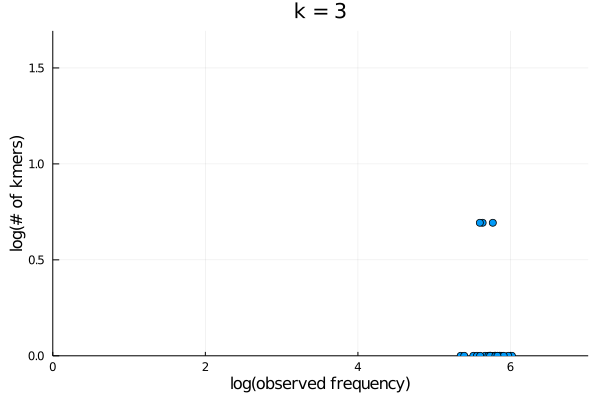

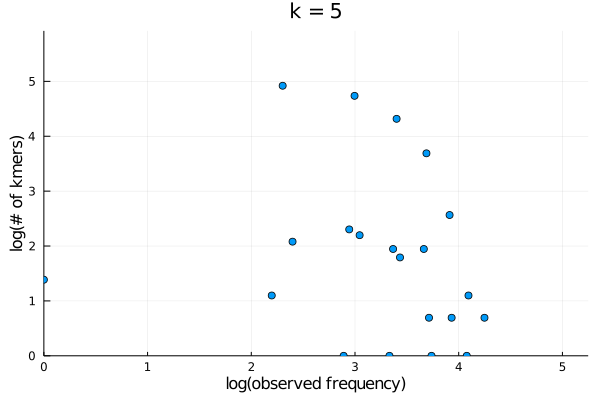

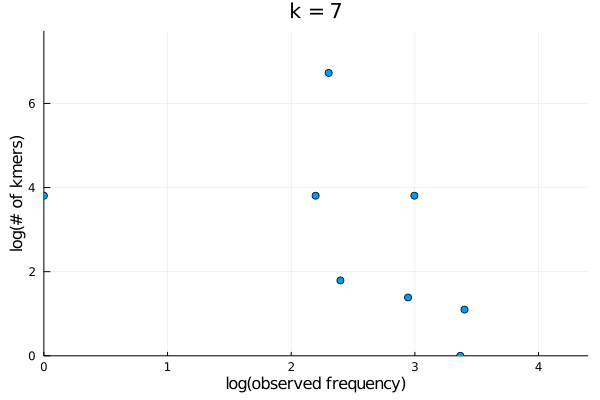

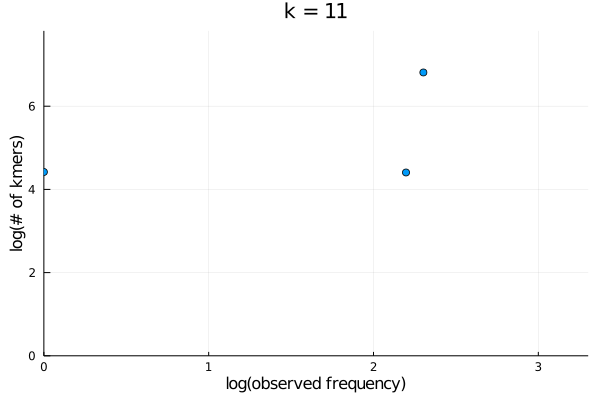

In [14]:
for k in ks
    kmer_type = BioSequences.BigDNAMer{k}
    kmer_counts = Eisenia.count_kmers(kmer_type, observations)
    counts = values(kmer_counts)
    plot = Eisenia.plot_kmer_frequency_spectra(
        counts,
        title = "k = $(k)"
    )
    display(plot)
end

Based on the above plots, I think I should start the assembly process with k = 3 and again with k = 5

kmer_saturation over time at different k lengths

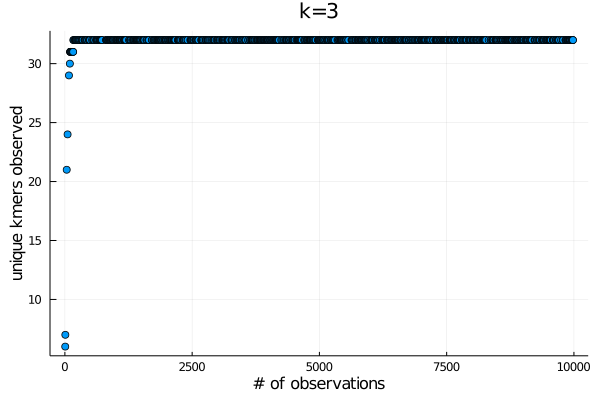

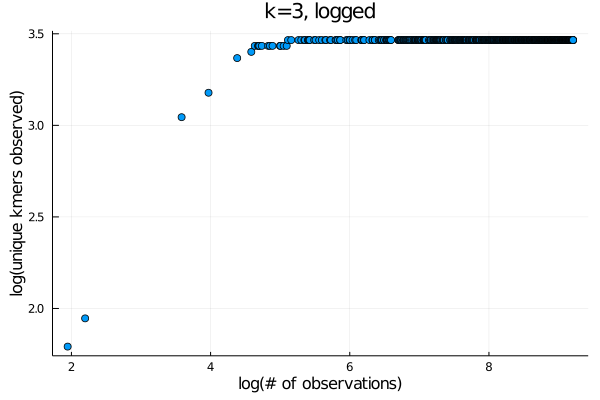

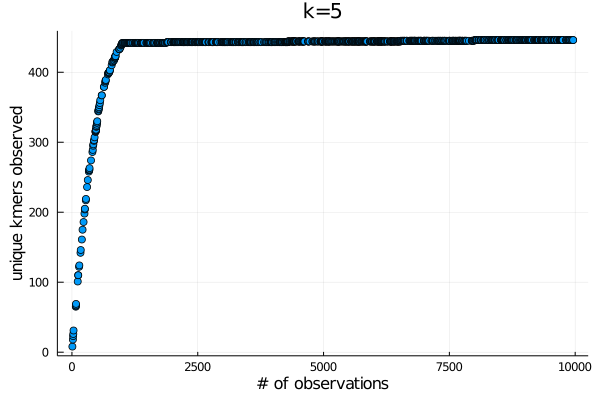

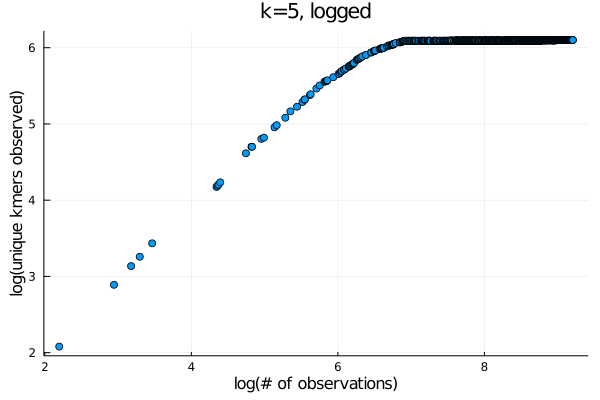

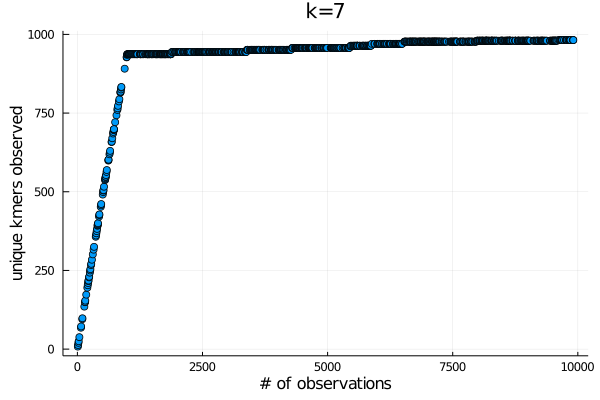

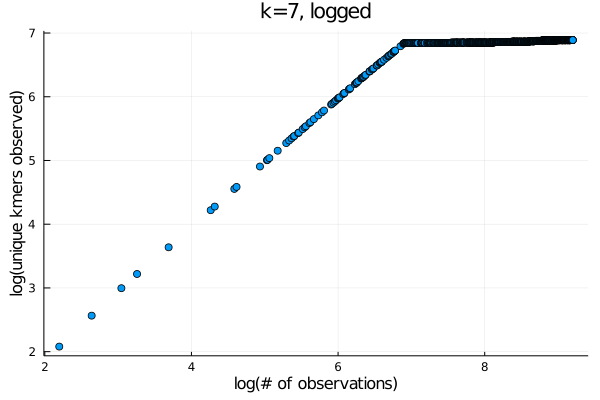

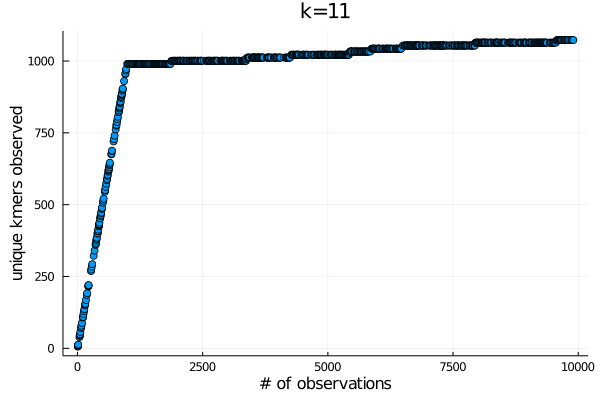

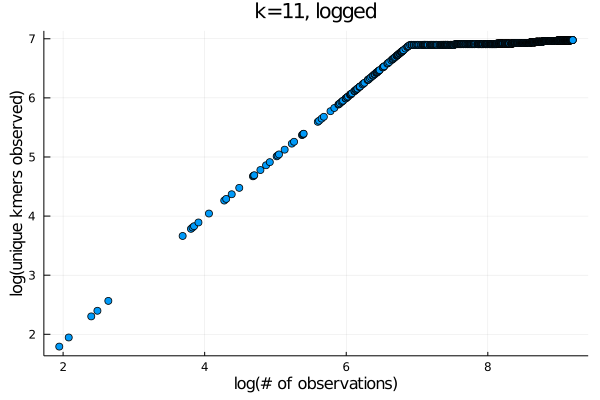

In [15]:
for k in ks
    kmer_type = BioSequences.BigDNAMer{k}
    unique_kmers = Set{kmer_type}()
    unique_kmer_saturation_counts = [0]
    for observation in observations
        for (index, forward_kmer, reverse_complement_kmer) in BioSequences.each(kmer_type, FASTX.sequence(observation))
            canonical_kmer = BioSequences.canonical(forward_kmer)
            push!(unique_kmers, canonical_kmer)
            push!(unique_kmer_saturation_counts, length(unique_kmers))
        end
    end
    xlims = 1:length(unique_kmer_saturation_counts)
    X = StatsBase.sample(xlims, 1000, replace=false, ordered=true)
    @assert issorted(X)
    Y = unique_kmer_saturation_counts[X]
    
    plot = StatsPlots.scatter(
        X,
        Y,
#         unique_kmer_saturation_counts,
        ylabel = "unique kmers observed",
        xlabel = "# of observations",
        title="k=$k",
        legend=false
    )
    display(plot)
    
    plot = StatsPlots.scatter(
        log.(X),
        log.(Y),
#         log.(1:length(unique_kmer_saturation_counts)),
#         log.(unique_kmer_saturation_counts),
        ylabel = "log(unique kmers observed)",
        xlabel = "log(# of observations)",
        title="k=$k, logged",
        legend=false
    )
    display(plot)
end

I'm not sure why the above has a sharp angle

In [26]:
for k in ks[1:1]
    kmer_type = BioSequences.BigDNAMer{k}
    @time kmer_graph = Eisenia.KmerGraph(kmer_type, observations);
    gfa_file = tempname(DIR, cleanup=false) * ".gfa"
    @time kmer_graph_to_gfa(kmer_graph, gfa_file)
    @show "here"
    @time bandage_plot_gfa(gfa_file, extension="svg")
    @show "here"
end

  0.014776 seconds (145.56 k allocations: 5.759 MiB)
  0.001293 seconds (5.43 k allocations: 330.266 KiB)
"here" = "here"


LoadError: MethodError: no method matching bandage_plot_gfa(::String; extension="svg")
Closest candidates are:
  bandage_plot_gfa(::Any) at In[24]:1 got unsupported keyword argument "extension"
  bandage_plot_gfa(::Any, !Matched::Any) at In[24]:1 got unsupported keyword argument "extension"
  bandage_plot_gfa(::Any, !Matched::Any, !Matched::Any) at In[24]:1 got unsupported keyword argument "extension"

3 genomes, 3 different sizes, 3 different frequencies